# Reading MonaLIA RDF Data
To run the local SPARQL over HTTP I've installed Apache Jena Fuseki service; started the service with 20Gb memmory option; uploaded the Joconde files:

    Joconde_2018-03-21.ttl
    reprskos.rdf
    domnskos.rdf
    skos.rdf
    monalia_skos.rdf
    
Dataset can be manages from http://localhost:3030   

https://stackoverflow.com/questions/13897712/where-do-i-test-my-queries-for-my-rdf-written-in-sparql
http://jena.apache.org/documentation/serving_data/index.html#download-fuseki1

For RDF data to pandas dataframe conversion all credit to Ted Lawless
https://lawlesst.github.io/notebook/sparql-dataframe.html

In [1]:
import os
import sys
import numpy as np
import pandas as pd

import json
from SPARQLWrapper import SPARQLWrapper, JSON, N3, XML

import matplotlib.pyplot as plt

In [2]:
# Import MonaLIA library from the package in the subfolder of the notebook folder
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from MonaLIA.util import metadata_helpers as metadata
from MonaLIA.data import stratified_split as imagedata


### Read the query string from the file

The file can be developed in CORESE GUI Application 

In [10]:
query_path = os.path.abspath(os.path.join('../..' , 'Queries', 'MonaLIA.DL Dataset.General.Subset.rq'))
f = open(query_path, mode='rt', encoding='utf-8') 
qs_templ = f.read()
f.close()
print(qs_templ)

#MonaLIA.DL Dataset Query General.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .
# replace number placeholder with the number of joint classes per image desired + 1
#    for ex.: 2 - disjoint classes, 3 - only images with two classes labels present and so on


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (group_concat(?topCategory_label; separator="+" ) as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) a

In [92]:
include_terms_list = ['"arbre"@fr',
                        '"en buste"@fr',
                        '"fleur"@fr',
                        '"nu"@fr',
                        '"cheval"@fr',
                        '"maison"@fr',
                        '"oiseau"@fr',
                        '"bateau"@fr',
                        '"église"@fr',
                        '"de profil"@fr',
                      
                        '"à mi-corps"@fr',
                        '"chien"@fr',
                        '"de face"@fr',
                        '"ange"@fr',
                        '"couronne"@fr',
                        '"livre"@fr',
                        '"chapeau"@fr',
                        '"draperie"@fr',
                        '"château"@fr',
                        '"montagne"@fr', 
                      
                        '"croix"@fr',
                        '"cavalier"@fr',
                        '"épée"@fr',
                        '"voiture à attelage"@fr',
                        '"pont"@fr',
                        '"main"@fr',
                        '"mer"@fr',
                        '"nudité"@fr',
                        '"feuille"@fr',
                        '"bateau à voiles"@fr',
                      
                        '"armure"@fr',
                        '"uniforme"@fr',
                        '"casque"@fr',
                        '"table"@fr',
                        '"tour"@fr',
                        '"lion"@fr',
                        '"drapeau"@fr',
                        '"mouton"@fr',
                        '"nuage"@fr',
                        '"robe"@fr',

                        '"bâton"@fr',
                        '"port"@fr',
                        '"parc"@fr',
                        '"manteau"@fr',
                        '"vache"@fr',
                        '"escalier"@fr',
                        '"fusil"@fr',
                        '"lit"@fr',
                        '"pêche"@fr',
                        '"cerf"@fr',
                      
                        '"cimetière"@fr',
                        '"bouclier"@fr',
                        '"sanglier"@fr',
                        '"porte"@fr',
                        '"fenêtre"@fr',
                        '"arcade"@fr',
                        '"chaise"@fr',
                        '"pot"@fr',
                        '"flèche"@fr',
                        '"poisson"@fr',
                      
                        '"Christ en croix"@fr',
                        '"chaussure"@fr',
                        '"trône"@fr',
                        '"bonnet"@fr',
                        '"papillon"@fr',
                        '"chat"@fr',
                        '"arc"@fr',
                        '"lyre"@fr',
                        '"tonneau"@fr',
                        '"tente"@fr',
                      
                        '"singe"@fr',
                        '"sac"@fr',
                        '"bouteille"@fr',
                        '"plage"@fr',
                        '"neige"@fr',
                        '"flûte"@fr',
                        '"éventail"@fr',
                        '"échelle"@fr',
                        '"moulin à vent"@fr',
                        '"rideau"@fr',

                        '"arènes"@fr',
                        '"éléphant"@fr',
                        '"pipe"@fr',
                        '"lettre"@fr',
                        '"phare"@fr',
                        '"roue"@fr',
                        '"horloge"@fr',
                        '"couteau"@fr',
                        '"guitare"@fr',
                        '"train"@fr',
                      
                        '"harpe"@fr',
                        '"automobile"@fr',
                        '"arc monumental"@fr',
                        '"assiette"@fr',
                        '"ours"@fr',
                        '"seau"@fr',
                        '"bicyclette"@fr',
                        '"pyramide"@fr',
                        '"grenouille"@fr',
                        '"avion"@fr',

                      '"piano"@fr',
                      '"aérostat"@fr']


                        #'"être humain"@fr' ]


exclude_terms_list = [] #['"le corps humain"@fr']

#include_terms_list = [ '"être humain"@fr', '"espèce animale"@fr' ] 

include_terms = ' '.join(['(%s)' % x for x in include_terms_list[:40] ])
exclude_terms = ' '.join(['(%s)' % x for x in exclude_terms_list])

include_terms

'("arbre"@fr) ("en buste"@fr) ("fleur"@fr) ("nu"@fr) ("cheval"@fr) ("maison"@fr) ("oiseau"@fr) ("bateau"@fr) ("église"@fr) ("de profil"@fr) ("à mi-corps"@fr) ("chien"@fr) ("de face"@fr) ("ange"@fr) ("couronne"@fr) ("livre"@fr) ("chapeau"@fr) ("draperie"@fr) ("château"@fr) ("montagne"@fr) ("croix"@fr) ("cavalier"@fr) ("épée"@fr) ("voiture à attelage"@fr) ("pont"@fr) ("main"@fr) ("mer"@fr) ("nudité"@fr) ("feuille"@fr) ("bateau à voiles"@fr) ("armure"@fr) ("uniforme"@fr) ("casque"@fr) ("table"@fr) ("tour"@fr) ("lion"@fr) ("drapeau"@fr) ("mouton"@fr) ("nuage"@fr) ("robe"@fr)'

In [96]:
qs = qs_templ % (include_terms, exclude_terms , 10)
print(qs)

#MonaLIA.DL Dataset Query General.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .
# replace number placeholder with the number of joint classes per image desired + 1
#    for ex.: 2 - disjoint classes, 3 - only images with two classes labels present and so on


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (group_concat(?topCategory_label; separator="+" ) as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) a

### Specify local service

In [105]:
#wds = "http://localhost:3030/Joconde/query" #Apache 
wds = "http://localhost:8080/sparql" #Corese

### Run  query

In [106]:
image_set_df = metadata.sparql_service_to_dataframe(wds, qs)
image_set_df.head()

,label,repr,image_path,ref,term_count_count,top_term_count,terms,domain
0,draperie+oiseau,"figures bibliques (Vierge à l'Enfant, chardonn...",/0357/m072904_dc13789_p.jpg,00000055013,2,2,draperie+chardonneret,peinture
1,livre,"nature morte (crâne, sphère : la terre, violon...",/0591/m072904_907-1-125_p.jpg,00000055015,1,1,livre,peinture
2,chien,"scène (couple, famille, paysan, vêtement, chie...",/0365/m072904_96-017222_p.jpg,00000055022,1,1,chien,peinture
3,chapeau,"portrait (La Fayette marquis de, debout, habit...",/0591/m072904_885-6_p.jpg,00000055025,1,1,chapeau,peinture
4,arbre,"paysage (chemin, effet de soleil, feuillu, per...",/0365/m072904_94-002193_p.jpg,00000055028,1,1,feuillu,peinture


In [102]:
image_set_df.shape

(97421, 8)

#### Give the short column names

In [14]:
col_names = ['label', 'repr', 'imagePath', 'ref',  'term_count', 'top_term_count',  'terms', 'domain']

image_set_df.columns = col_names
print('Shape:' ,  image_set_df.shape)

#image_set_df.fillna('', inplace=True)
print(image_set_df.groupby(['label']).size().reset_index())

Shape: (97421, 8)
                                                  label     0
0                                                  ange  1446
1                                            ange+arbre    53
2     ange+arbre+armure+bateau+casque+drapeau+oiseau...     1
3     ange+arbre+armure+casque+cheval+couronne+croix...     1
4                  ange+arbre+armure+casque+nudité+épée     1
...                                                 ...   ...
5954                                  à mi-corps+église     5
5955                                    à mi-corps+épée    30
5956                                             église  2906
5957                                        église+épée    12
5958                                               épée   546

[5959 rows x 2 columns]


## Add image size columns (if not queried before)

quickest way but the size can be queried in the initial query

In [15]:
if('width' not in image_set_df.columns):
    csv_file_name = 'C:/Users/abobashe/Documents/MonaLIA/Joconde/Ext/main_image_size.csv'
    image_size_df = pd.read_csv(csv_file_name)
    image_root = 'C:\\Joconde\\joconde'

    try:
        image_size_df
    except NameError:
        image_set_df['width'] = 0
        image_set_df['height'] = 0

    else:
        image_set_df = pd.merge(image_set_df,
                                image_size_df[['ref', 'width', 'height']],
                                on='ref',
                                how='left')
        image_set_df.fillna(0 , inplace=True)


    error_count = 0
    new_count = 0

    for i, row in image_set_df[image_set_df.width == 0].iterrows():

        if os.path.isfile(image_root + row.imagePath) :
            try:

                image = Image.open(image_root + row.imagePath)

                # get image size
                #images_df.loc[i, ['exists']] = True
                image_set_df.loc[i, ['width']] = image.size[0]
                image_set_df.loc[i, ['height']] = image.size[1]

                image.close()
                new_count += 1
            except:
                error_count += 1
        if i % 1000 == 0:
            print (i, end=', ')

    print()            
    print('updated size %d; detected %d errors' %  (new_count, error_count))
image_set_df.head()                    

4000, 6000, 27000, 33000, 68000, 93000, 95000, 
updated size 0; detected 0 errors


,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,width,height
0,bateau,"paysage (canal, village, passerelle, barque, p...",/0093/m503501_d0109897-000_p.jpg,50350109897,1,1,barque,dessin,768,512
1,arbre+maison,"vue d'architecture (arbre, place, maison, Cour...",/0650/m080901_031011_p.jpg,M0809027797,2,2,arbre+maison,dessin,696,600
2,en buste,"portrait (Henri III, roi de Pologne, roi de Fr...",/0662/m501702_0006031_p.jpg,50170000659,1,1,en buste,estampe ; histoire,432,600
3,nu,"figure (femme, nu, debout)",/0506/m504401_d-3861_p.jpg,50440002374,1,1,nu,dessin,266,600
4,maison,"vue d'architecture (Angers, ville, maison, jar...",/0624/m074801_0010663_p.jpg,07480014655,1,1,maison,dessin,800,561


In [18]:
dataset_root = 'C:/Datasets/Joconde'
top_category =  'Forty classes' 
class_root = os.path.join(dataset_root, top_category)
group_by = 'label'


## Filter Data
filter out the records that have invalid image path

filter out the images that are too tall or too long

In [19]:
aspect_ratio_thershold = 5.0
large_category_threshold = 1200

In [20]:
print(image_set_df.shape , ' total')
print(image_set_df[image_set_df.width > 0].shape, 'images exist')

filtered_df = image_set_df[(image_set_df.width > 0) &
                        (image_set_df.width/image_set_df.height <= aspect_ratio_thershold) &
                        (image_set_df.height/image_set_df.width <= aspect_ratio_thershold) ]

print(filtered_df.shape , 'required aspect ratio <= %.2f' % aspect_ratio_thershold)
filtered_df.groupby(by=group_by).size()


(97421, 10)  total
(92295, 10) images exist
(92262, 10) required aspect ratio <= 5.00


label
ange                                                    1416
ange+arbre                                                52
ange+arbre+armure+bateau+casque+drapeau+oiseau+épée        1
ange+arbre+armure+casque+cheval+couronne+croix+nuage       1
ange+arbre+armure+casque+nudité+épée                       1
                                                        ... 
à mi-corps+église                                          5
à mi-corps+épée                                           30
église                                                  2671
église+épée                                               12
épée                                                     527
Length: 5687, dtype: int64

filter out the Ceramics as they mess up the classification

In [21]:
#filtered_df = filtered_df[filtered_df.domain.str.contains('céramique')==False]
filtered_df = filtered_df[filtered_df.domain.str.contains('peinture')==True]
#filtered_df = filtered_df[filtered_df.label != 'espèce animale+élément d\'architecture']
#filtered_df = filtered_df[filtered_df.label != 'élément d\'architecture+être humain']

#print(filtered_df.shape, 'without céramique')
print(filtered_df.shape, 'paintings only')
print(filtered_df.groupby(by=group_by).size())

filtered_df.head()

(20772, 10) paintings only
label
ange                                                    469
ange+arbre                                               24
ange+arbre+armure+casque+cheval+couronne+croix+nuage      1
ange+arbre+armure+casque+nudité+épée                      1
ange+arbre+armure+fleur+maison+église+épée                1
                                                       ... 
à mi-corps+église                                         5
à mi-corps+épée                                          18
église                                                  274
église+épée                                               2
épée                                                    117
Length: 2519, dtype: int64


,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,width,height
13,table,"scène (Ulysse, Achille, palais, colonne, tentu...",/0290/m018104_0001312_p.jpg,01810005618,1,1,table,peinture,384,512
25,arbre+nu,"scène (homme : nu, cours d'eau, femme) ; fond ...",/0532/m501104_10-521736_p.jpg,50110000449,2,2,feuillu+nu,peinture,800,585
31,en buste,"autoportrait (Bottini Georges Alfred, homme, e...",/0541/m506004_94-053309_p.jpg,000PE018379,1,1,en buste,peinture,466,600
43,chapeau+en buste,"portrait (rétrospectif, Bourbon François de, E...",/0397/m505204_pe-397-21-scan_p.jpg,00000104699,2,2,chapeau+en buste,peinture,404,512
49,en buste,"portrait d'inconnu (femme, en buste, de trois-...",/0541/m506004_94-053307_p.jpg,000PE018378,1,1,en buste,peinture,496,600


## Image Size Distribution

<Figure size 432x288 with 0 Axes>

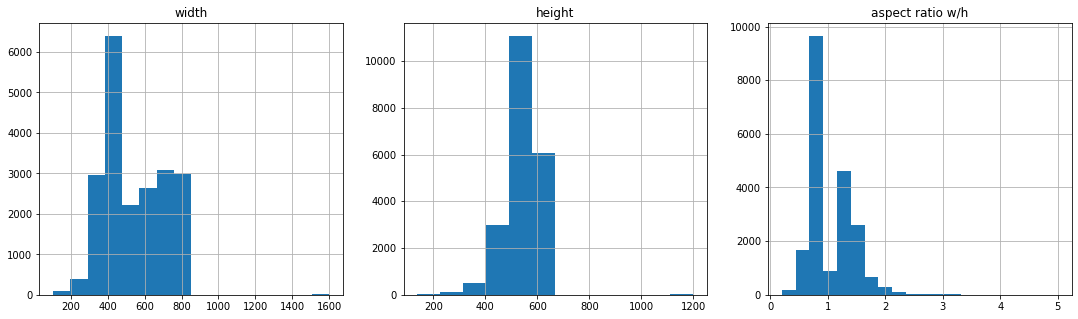

In [22]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=3,  gridspec_kw = {'width_ratios':[1, 1, 1]})
fig.set_size_inches(18.5, 5)

axes[0].set_title('width')
filtered_df.width.hist(bins=16, ax=axes[0])
axes[1].set_title('height')
filtered_df.height.hist(bins=12, ax=axes[1])
axes[2].set_title('aspect ratio w/h')
(filtered_df.width /filtered_df.height).hist(bins=20, ax=axes[2])
plt.show()

## Stratified Split

In [25]:
cat_list = filtered_df.groupby(by=group_by).size()

min_strata_size = 1200#cat_list.min()

dataset_split = {'train': 0.9,
                 'val':   0.1,
                 'test':  0.1}

In [26]:
filtered_df['usage'] = 'remain'

for category in cat_list.keys():
    if ('chat' in category):
        train_idx, val_idx, test_idx = imagedata.train_validate_test_split(filtered_df[filtered_df[group_by] == category],
                                                             train_percent = dataset_split['train'],
                                                             val_percent = 600 / 1200,
                                                             test_percent = 600 / 1200,
                                                             max_size = min_strata_size)
    else:
        train_idx, val_idx, test_idx = imagedata.train_validate_test_split(filtered_df[filtered_df[group_by] == category],
                                                             train_percent = dataset_split['train'],
                                                             val_percent = dataset_split['val'],
                                                             test_percent = dataset_split['test'],
                                                             max_size = min_strata_size)

    filtered_df.loc[train_idx , ['usage']] = 'train'
    filtered_df.loc[val_idx , ['usage']] = 'val'
    filtered_df.loc[test_idx , ['usage']] = 'test'


# Two way frequency table
pd.options.display.max_rows = 999
pd.crosstab(index=filtered_df[group_by], 
                  columns=filtered_df['usage'])

usage,remain,test,train,val
label,,,,
ange,0,46,377,46
ange+arbre,0,2,20,2
ange+arbre+armure+casque+cheval+couronne+croix+nuage,0,0,1,0
ange+arbre+armure+casque+nudité+épée,0,0,1,0
ange+arbre+armure+fleur+maison+église+épée,0,0,1,0
...,...,...,...,...
à mi-corps+église,0,0,5,0
à mi-corps+épée,0,1,16,1
église,0,27,220,27


In [72]:
d = {'train': filtered_df[filtered_df.usage == 'train'] ['label'].str.replace('+', '|').str.get_dummies().sum(), 
     'val': filtered_df[filtered_df.usage == 'val'] ['label'].str.replace('+', '|').str.get_dummies().sum(),
     'test': filtered_df[filtered_df.usage == 'test'] ['label'].str.replace('+', '|').str.get_dummies().sum(), 
     'remain': filtered_df[filtered_df.usage == 'remain'] ['label'].str.replace('+', '|').str.get_dummies().sum()}

pd.DataFrame(data=d)

,train,val,test,remain
ange,901,66,66,NaN
arbre,3101,249,249,56.0
armure,572,28,28,NaN
bateau,1429,103,103,NaN
bateau à voiles,633,49,49,NaN
casque,359,10,10,NaN
cavalier,610,28,28,NaN
chapeau,688,45,45,NaN
cheval,1027,55,55,NaN
chien,1213,79,79,NaN


### Save Dataset Description file

In [73]:
image_set_desc_file = os.path.join(class_root, 'dataset5.paintings.csv')

if not os.path.exists(class_root):
    os.makedirs(class_root)
    
filtered_df.to_csv(image_set_desc_file)

### Cross Validation Split

In [8]:
group_by='label'
cat_list = filtered_df.groupby(by=group_by).size()

min_strata_size = 1000# cat_list.min()

In [9]:
filtered_df['usage'] = 'remain'

for category in cat_list.keys():
    trainval_idx, test_idx = imagedata.train_cross_validate_test_split(filtered_df[filtered_df[group_by] == category],
                                                             trainval_percent = 0.9,
                                                             test_percent = 0.1,
                                                             n_folds = 10,
                                                             max_size = min_strata_size)
    
    for i , fold_idx in enumerate(trainval_idx):
        filtered_df.at[fold_idx, ['usage']] = 'train' + str(i)
        
    filtered_df.loc[test_idx , ['usage']] = 'test'


# Two way frequency table
pd.crosstab(index=filtered_df[group_by], 
            columns=filtered_df['usage'])

usage,remain,test,train0,train1,train2,train3,train4,train5,train6,train7,train8,train9
label,,,,,,,,,,,,
canidé,0,78,70,70,70,70,70,70,70,70,70,70
oiseau,101,100,90,90,90,90,90,90,90,90,90,90
équidé,212,100,90,90,90,90,90,90,90,90,90,90
être humain,32454,100,90,90,90,90,90,90,90,90,90,90


In [12]:
image_set_desc_file = os.path.join(descr_path, 'dataset1_cv.csv')

if not os.path.exists(descr_path):
    os.makedirs(descr_path)
    
filtered_df.to_csv(image_set_desc_file)

# Scrapbook

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

mlb.fit_transform(filtered_df['label'].str.split('+'))[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
query_style = '''
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>
prefix ml: <http://ns.inria.fr/monalia/> 


select ?imageWidth ?imageHeight ?imagePath ?noticeTechnique ?technique1  ?technique2 ?technique3 ?noticeTechnique1 ?noticeTechnique2 ?noticeTechnique3 
where {
  
?notice ml:noticeImage [ ml:imageHeight ?imageHeight ;ml:imageWidth ?imageWidth ; ml:imagePath ?imagePath].
?notice jcl:noticeRef ?noticeRef.
               filter (?imageHeight > 0)
    ?notice jcl:noticeTech ?noticeTechnique

 bind( replace(?noticeTechnique, ",", ";") as ?technique ).
                bind( if(contains (?technique, ";"),  strbefore( ?technique, ";" ) , ?technique) as ?technique1 ).
 bind( if(contains (?technique, ";"),  strafter( ?technique, ";" ), "")  as ?temp1 ).
                bind( if(contains (?temp1, ";"),  strbefore( ?temp1, ";" ) , ?temp1) as ?technique2 ).
                bind( if(contains (?temp1, ";"),  strafter( ?temp1, ";" ), "")  as ?temp2 ).
                bind( if(contains (?temp2, ";"),  strbefore( ?temp2, ";" ) , ?temp2) as ?technique3 )       .

#removing leading, trailing and double spaces
               bind("^\\\\s+(.*?)\\\\s*$|^(.*?)\\\\s+$"  as ?regexp).
              bind( lcase( replace(?technique1, ?regexp, '$1$2'))  AS ?noticeTechnique1).
bind( lcase( replace(?technique2, ?regexp, '$1$2'))  AS ?noticeTechnique2).
               bind( lcase( replace(?technique3, ?regexp, '$1$2'))  AS ?noticeTechnique3) .

}
order by ?technique1 ?technique2 ?technique3 
'''

In [85]:
import nltk
from nltk import bigrams

corpus = "cat dog lion zebra cat zebra cat dog"

bi_grams = list(bigrams(corpus.split()))

bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

In [86]:
bigram_freq

[(('cat', 'dog'), 2),
 (('zebra', 'cat'), 2),
 (('dog', 'lion'), 1),
 (('lion', 'zebra'), 1),
 (('cat', 'zebra'), 1)]

In [88]:
bi_grams

[('cat', 'dog'),
 ('dog', 'lion'),
 ('lion', 'zebra'),
 ('zebra', 'cat'),
 ('cat', 'zebra'),
 ('zebra', 'cat'),
 ('cat', 'dog')]